## Plot CSV
The goal of this notebook is to take a csv from the embedded ESP8266 device in the and utilize matplotlib to plot both the humdity and temperature over time

In [121]:
# Standard Libraries
import datetime
import csv
import os
import time

# 3rd Party Libraries
import matplotlib.pyplot as plt
import requests

In [122]:
# Environment Variables
embedded_csv_url = 'http://192.168.1.197'


## Requesting Data
This section is going to make the requests to the embedded device, parse for content (note this is not body nor json but that actual html text)
Then it is going to convert that content to a csv and then create lists of each column of the csv (timestamp, temp, humidity)

In [144]:
# Request for data
data = requests.get(embedded_csv_url)
csv_data = data.text

In [145]:
# Moved this to a seperate cell so I can reload data w/o having to make another request
lines = csv_data.splitlines()[1:]
reader = csv.reader(lines, delimiter=',')

# Create Arrays for the different data
timestamp_list = []
temp_list = []
humidity_list = []

for row in reader:
    timestamp_list.append(datetime.datetime.fromtimestamp(int(row[0])).strftime('%H:%M:%S'))
    temp_list.append(float(row[1]))
    humidity_list.append(float(row[2]))
    
# Skip headers
#timestamp_list = timestamp_list[]
#temp_list = temp_list[]
#humidity_list = humidity_list[]
    
print("First 5 of Timestamp List: {}".format(timestamp_list[:5]))
print("First 5 of Temp List: {}".format(temp_list[:5]))
print("First 5 of Humdity List: {}".format(humidity_list[:5]))

First 5 of Timestamp List: ['13:20:53', '13:21:03', '13:21:13', '13:21:23', '13:21:33']
First 5 of Temp List: [72.5, 72.5, 72.5, 72.5, 72.5]
First 5 of Humdity List: [47.0, 47.0, 47.0, 47.0, 47.0]


## Plotting the Data
In this section were going to plot the humidity and temp as y values a

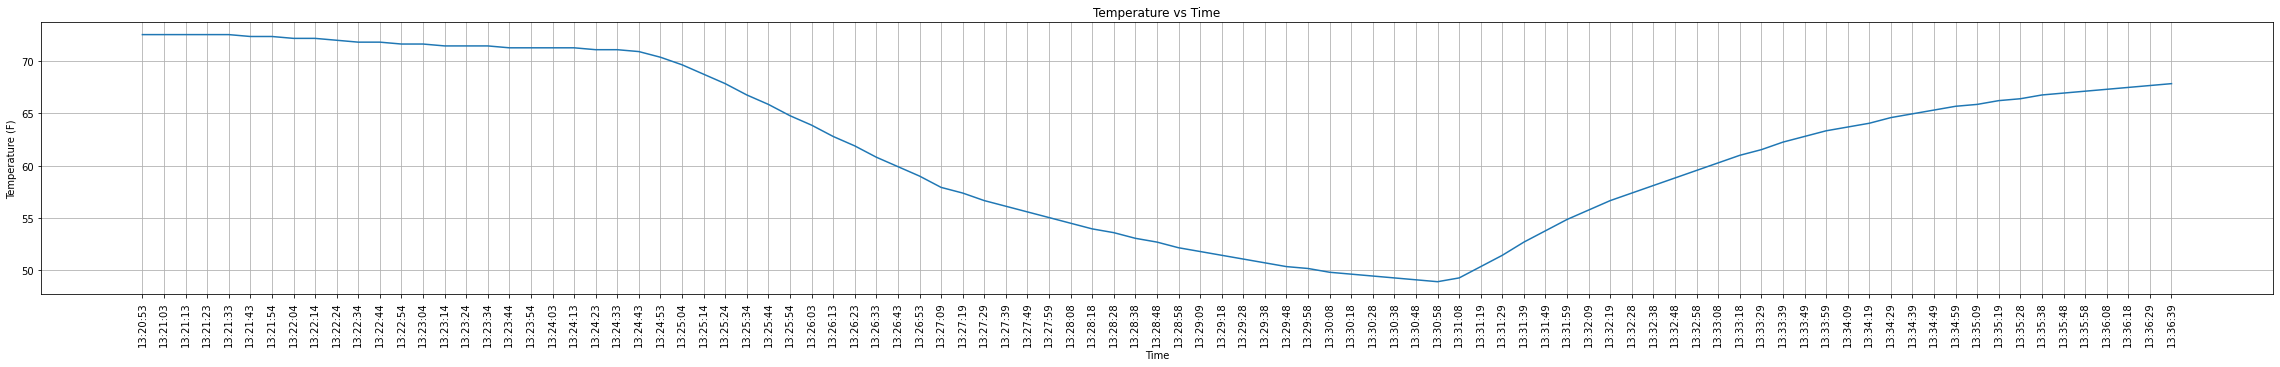

In [146]:
plt.rcParams["figure.figsize"] = (40,5)
plt.plot(timestamp_list, temp_list, label='Temperature')
plt.title('Temperature vs Time')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.xticks(rotation = 90)
#plt.ylim([0,100])
plt.grid()
plt.show()

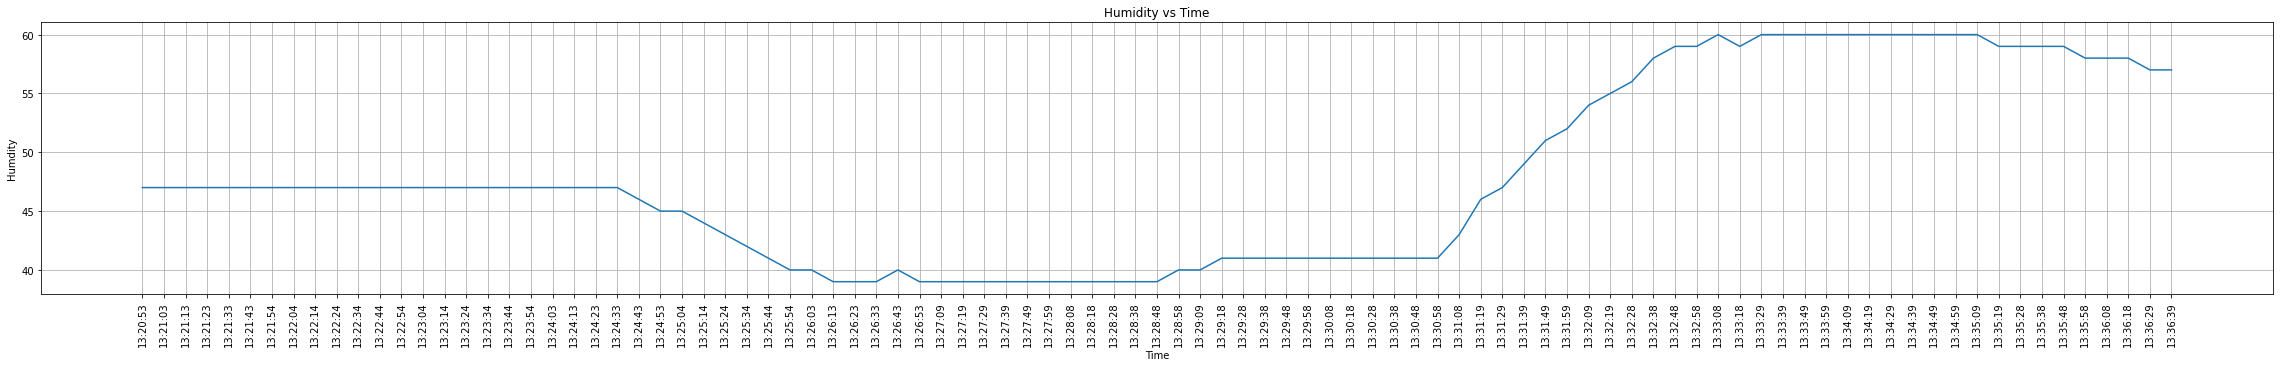

In [147]:
plt.rcParams["figure.figsize"] = (40,5)
plt.plot(timestamp_list, humidity_list)
plt.title('Humidity vs Time')
plt.xlabel('Time')
plt.ylabel('Humdity')
plt.xticks(rotation = 90)
plt.grid()
plt.show()